In [1]:
#-------------------------------------------------------------------------------------------------------------------------------
#importing the necessary libraries
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import cross_validate

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [2]:
#-------------------------------------------------------------------------------------------------------------------------------
#importing the dataset
#-------------------------------------------------------------------------------------------------------------------------------
used_bikes=pd.read_csv('Used_Bikes.csv')
used_bikes.head()

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha


In [3]:
#-------------------------------------------------------------------------------------------------------------------------------
#checking for null values
#-------------------------------------------------------------------------------------------------------------------------------
used_bikes.isnull().sum()

bike_name     0
price         0
city          0
kms_driven    0
owner         0
age           0
power         0
brand         0
dtype: int64

In [4]:
#-------------------------------------------------------------------------------------------------------------------------------
#statistical properties of the dataset
#-------------------------------------------------------------------------------------------------------------------------------
used_bikes.describe()

,price,kms_driven,age,power
count,3.264800e+04,32648.000000,32648.000000,32648.000000
mean,6.829542e+04,26344.625184,8.048211,213.511302
std,9.071860e+04,22208.527695,4.031700,134.428868
min,4.400000e+03,1.000000,1.000000,100.000000
25%,2.500000e+04,12000.000000,5.000000,150.000000
50%,4.300000e+04,20373.000000,7.000000,150.000000
75%,8.000000e+04,35000.000000,10.000000,220.000000
max,1.900000e+06,750000.000000,63.000000,1800.000000


In [5]:
#-------------------------------------------------------------------------------------------------------------------------------
#checking correlation 
#-------------------------------------------------------------------------------------------------------------------------------
used_bikes.corr()

,price,kms_driven,age,power
price,1.000000,-0.313955,-0.399133,0.862376
kms_driven,-0.313955,1.000000,0.484684,-0.264016
age,-0.399133,0.484684,1.000000,-0.337035
power,0.862376,-0.264016,-0.337035,1.000000


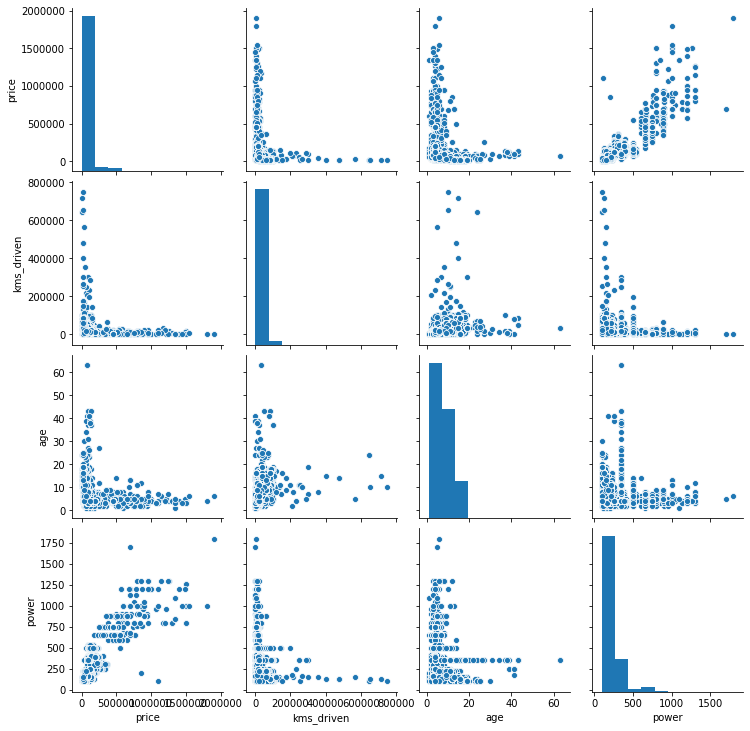

In [6]:
#-------------------------------------------------------------------------------------------------------------------------------
#visualizing correlation 
#-------------------------------------------------------------------------------------------------------------------------------
sns.pairplot(used_bikes);

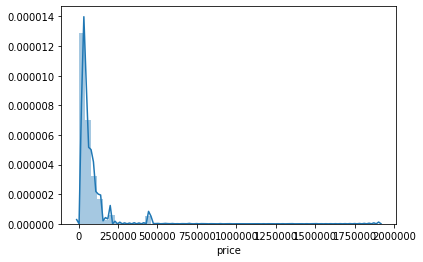

In [7]:
#-------------------------------------------------------------------------------------------------------------------------------
#distribution of price column 
#-------------------------------------------------------------------------------------------------------------------------------
sns.distplot(used_bikes.price);

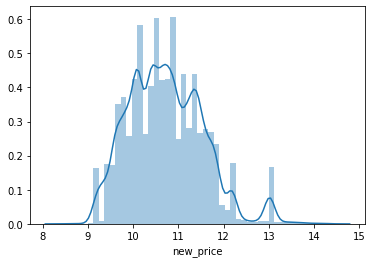

In [8]:
#-------------------------------------------------------------------------------------------------------------------------------
#transforming the price column to reduce skewness
#-------------------------------------------------------------------------------------------------------------------------------
used_bikes['new_price']=np.log(used_bikes.price)

sns.distplot(used_bikes.new_price);

In [9]:
#-------------------------------------------------------------------------------------------------------------------------------
#columns to be used for modelling
#-------------------------------------------------------------------------------------------------------------------------------
X_cols=['kms_driven','owner','age','power','brand']
y_cols=['new_price']

obj_cols=['owner','brand']

In [10]:
#-------------------------------------------------------------------------------------------------------------------------------
#encoding the categorical variables in the data
#-------------------------------------------------------------------------------------------------------------------------------
X=used_bikes[X_cols]
y=used_bikes[y_cols]

encoder=OrdinalEncoder()
X_encoded=X.copy()

X_encoded[obj_cols]=encoder.fit_transform(X[obj_cols])

In [11]:
#-------------------------------------------------------------------------------------------------------------------------------
#defining the models
#-------------------------------------------------------------------------------------------------------------------------------
linreg=LinearRegression()
knnreg=KNeighborsRegressor(n_neighbors=5)
ranfor=RandomForestRegressor(n_estimators=50)
xgb=XGBRegressor()

models={'Linear regression':linreg,
        "KNN-Regressor":knnreg,
       'Random Forest regression':ranfor,
       'XGB Regressor':xgb}

In [12]:
#-------------------------------------------------------------------------------------------------------------------------------
#cross-validation score for the models
#-------------------------------------------------------------------------------------------------------------------------------
cross_val_score_r2={}
for model in models:
    cross_val_score_r2[model]=cross_validate(models[model],X_encoded,y.values.ravel(),scoring='r2',cv=5)['test_score'].mean()
    
cross_val_score_r2

{'Linear regression': 0.8648210888093522,
 'KNN-Regressor': 0.899556283432366,
 'Random Forest regression': 0.9730319680944968,
 'XGB Regressor': 0.9736650490214291}

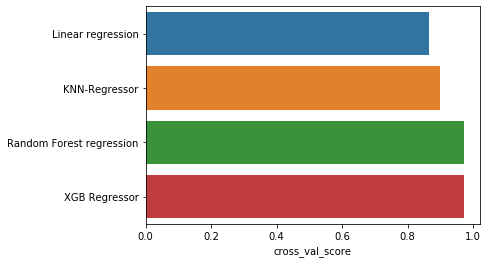

In [13]:
#------------------------------------------------------------------------------------------------------------------------------
#visualizing cross-validation score for the models
#-------------------------------------------------------------------------------------------------------------------------------
y_ax=list(cross_val_score_r2.keys())
x_ax=list(cross_val_score_r2.values())

sns.barplot(y=y_ax,x=x_ax)
plt.xlabel('cross_val_score');

In [14]:
#-------------------------------------------------------------------------------------------------------------------------------
#mean absolute error for the models
#-------------------------------------------------------------------------------------------------------------------------------
cross_val_score_mse={}
for model in models:
    cross_val_score_mse[model]=-1*(cross_validate(models[model],X_encoded,y.values.ravel(),scoring='neg_mean_squared_error',cv=5)['test_score'].mean())
    
cross_val_score_mse

{'Linear regression': 0.09082994450450323,
 'KNN-Regressor': 0.0676384109539986,
 'Random Forest regression': 0.018266373218935924,
 'XGB Regressor': 0.017742222552566033}

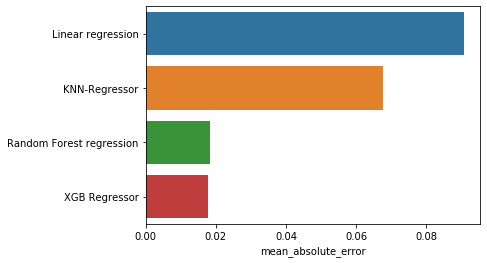

In [15]:
#------------------------------------------------------------------------------------------------------------------------------
#visualizing mean absolute error for the models
#-------------------------------------------------------------------------------------------------------------------------------
y_ax=list(cross_val_score_mse.keys())
x_ax=list(cross_val_score_mse.values())

sns.barplot(y=y_ax,x=x_ax)
plt.xlabel('mean_absolute_error');

In [16]:
#------------------------------------------------------------------------------------------------------------------------------
#training the XBGRegressor
#-------------------------------------------------------------------------------------------------------------------------------
xgb.fit(X_encoded.values,y.values)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, objective='reg:squarederror',
             predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [17]:
#------------------------------------------------------------------------------------------------------------------------------
#r2_score for XGBRegressor
#-------------------------------------------------------------------------------------------------------------------------------
cross_validate(xgb,X_new,y,scoring='r2')['test_score'].mean()

NameError: name 'X_new' is not defined